In [90]:
# imports 

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np



from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [30]:
# read in xls file 

df = pd.read_excel('')
print(df.shape)
df.head()

(15474, 4)


,treatment,company_size,campaign_spend,campaign_budget
0,False,small,10.4477,3.9035
1,False,medium,3.7776,1.9872
2,False,medium,46.1880,55.4523
3,False,small,6.6271,6.5136
4,False,small,92.3405,83.1018


## Feature 

In [31]:
# Create column 'percent_of_budget' 
#      =  (campaign_spend / campaign_budget) * 100

df['percent_of_budget'] = (df['campaign_spend'] / df['campaign_budget'])
df.head(2)

,treatment,company_size,campaign_spend,campaign_budget,percent_of_budget
0,False,small,10.4477,3.9035,2.676495
1,False,medium,3.7776,1.9872,1.900966


In [32]:
# Ordinal Encoding

df['company_size'] = df['company_size'].map({'small':1,'medium':2,'large':3})
df['treatment'] = df['treatment'].map({False:0,True:1})

In [33]:
df.head()

,treatment,company_size,campaign_spend,campaign_budget,percent_of_budget
0,0,1,10.4477,3.9035,2.676495
1,0,2,3.7776,1.9872,1.900966
2,0,2,46.1880,55.4523,0.832932
3,0,1,6.6271,6.5136,1.017425
4,0,1,92.3405,83.1018,1.111173


In [ ]:
## looking at 

In [83]:
df['campaign_budget'].skew()

76.20526926142672

In [100]:
X = df[['campaign_budget']]

In [101]:
type(X)

pandas.core.frame.DataFrame

In [115]:
new = pd.DataFrame()
type(new)

pandas.core.frame.DataFrame

In [114]:
a = Normalizer().fit(X)
new['a'] = a.transform(X)

Exception: Data must be 1-dimensional

In [104]:
ss = StandardScaler()
b = ss.fit(X)

In [116]:
b = b.transform(X)

In [120]:
b.plot().hist

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)

# Campaign Budget

In [158]:
df['campaign_budget'].skew()

76.20526926142672

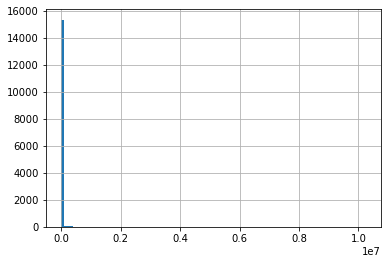

In [159]:
df['campaign_budget'].hist(bins = 100);

In [ ]:
I am going to remove the outliers so that i can see the distrobution of the curve 

### Idenifying Outliers 

In [126]:
## outliers for campaign budget

Q1 = df['campaign_budget'].quantile(.25)
Q3 = df['campaign_budget'].quantile(.75)
IQR = Q3 - Q1

In [144]:
# Number of outliers past upper inner fence 

df[ (df['campaign_budget'] > (Q3 + 1.5 * IQR) )].count()

treatment            2680
company_size         2680
campaign_spend       2680
campaign_budget      2680
percent_of_budget    2680
dtype: int64

In [142]:
# Number of outliers past upper outer fence 

df[ (df['campaign_budget'] > (Q3 + 3 * IQR) )].count()

treatment            2273
company_size         2273
campaign_spend       2273
campaign_budget      2273
percent_of_budget    2273
dtype: int64

Above is the outlers that are past upper outer fence 

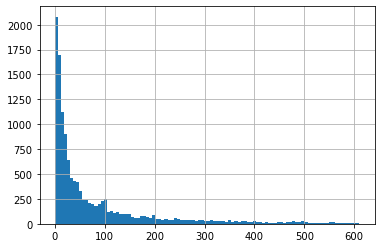

In [150]:
# distrobution of Campaign budget BELLOW upper outer fence

under_UpperInnerFence =  df[ (df['campaign_budget'] <= (Q3 + 1.5 * IQR) )]
df[ (df['campaign_budget'] <= (Q3 + 1.5 * IQR) )]['campaign_budget'].hist(bins = 100);

In [149]:
under_UpperInnerFence 

0         3.9035
1         1.9872
2        55.4523
3         6.5136
4        83.1018
          ...   
15468    20.6292
15469    47.5802
15470    44.3909
15471    89.0695
15473    14.5895
Name: campaign_budget, Length: 12794, dtype: float64

In [ ]:
df[ (df['campaign_budget'] <= (Q3 + 1.5 * IQR) )]

### comparison 

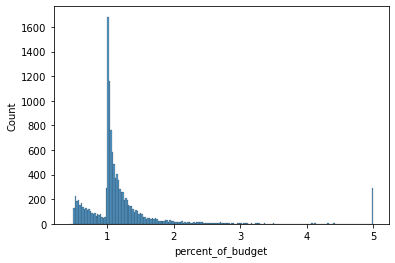

In [155]:
sns.histplot( data = under_UpperInnerFence, x = 'percent_of_budget');

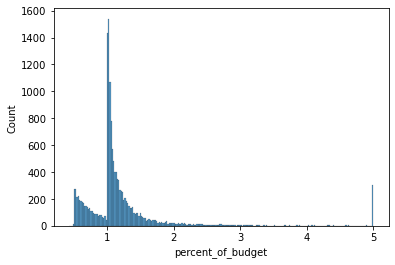

In [156]:
sns.histplot( data = df, x = 'percent_of_budget');

In [78]:
# identify outliers 

df.quantile()


treatment             0.000000
company_size          1.000000
campaign_spend       15.178125
campaign_budget      12.792900
percent_of_budget     1.003081
Name: 0.25, dtype: float64

In [75]:
# divide the Curves

SM_distrubution = df[ df['percent_of_budget'] < 1 ]
LG_distrubution = df[ df['percent_of_budget'] >= 1 ]


# number of rows in origonal 
print(df['treatment'].count())
# confirm no rows are missing
print(SM_distrubution.count() + LG_distrubution.count())

15474
treatment            15474
company_size         15474
campaign_spend       15474
campaign_budget      15474
percent_of_budget    15474
dtype: int64


## Disrobutions for small curves

In [ ]:
## check for outliers 



In [76]:
(df['treatment'] == 0)
(df['treatment'] == 1);

In [77]:
(df['company_size'] == 1)
(df['company_size'] == 2)
(df['company_size'] == 3);

In [36]:
# t_small
t_small = df[(df['treatment'] == 0) & (df['company_size'] == 1)]

In [56]:
# t_large
t_large = df[(df['treatment'] == 0) & (df['company_size'] == 3)]

In [58]:
# t_medium 
t_medium = df[(df['treatment'] == 0) & (df['company_size'] == 2)]


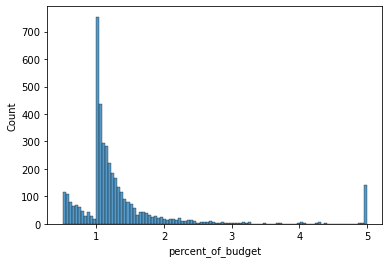

In [65]:

sns.histplot( data = t_small, x = 'percent_of_budget')

<bound method Axes.hist of <matplotlib.axes._subplots.AxesSubplot object at 0x7fd4d5c47610>>

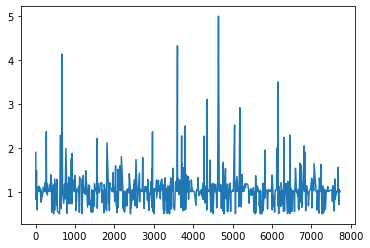

In [59]:
t_medium['percent_of_budget'].plot().hist

KeyError: 'percent_of_budget'

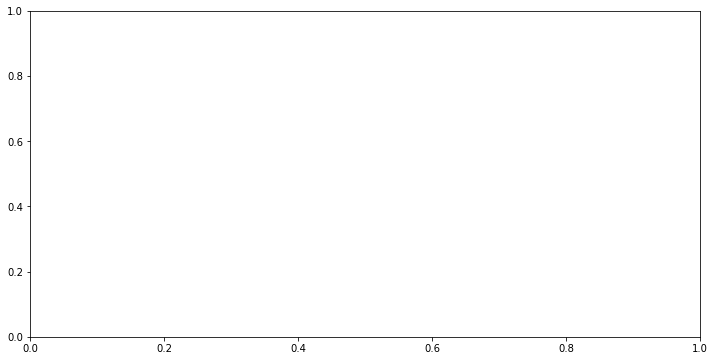

In [7]:
# Plot the scatter
ax = df.plot(kind="scatter", x="percent_of_budget", y="campaign_budget", 
                c = "cluster", figsize=(12,6), s=50,cmap='viridis')
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)


## Creating data set

In [ ]:
df.head()

In [ ]:
X = df.drop(['treatment','company_size','campaign_spend'], axis = 1)


# new X 

In [ ]:
X = df['campaign_budget']
X

In [ ]:
# Scale data

sscaler = StandardScaler()
X_scaled = sscaler.fit_transform(X)

In [ ]:
X_scaled[0]

In [ ]:
# kmeans 

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)


In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
kmeans.predict(X_scaled)

In [ ]:
# adds cluster names 

df['cluster'] = kmeans.labels_

In [ ]:
df.sample(3)

In [7]:
# 

unscaled_centers = sscaler.inverse_transform(kmeans.cluster_centers_)

centroids = pd.DataFrame(unscaled_centers, columns = ['campaign_budget','percent_of_budget'])

NameError: name 'sscaler' is not defined

In [8]:
# 

print(unscaled_centers)
centroids

NameError: name 'unscaled_centers' is not defined

NameError: name 'centroids' is not defined

<Figure size 504x504 with 0 Axes>

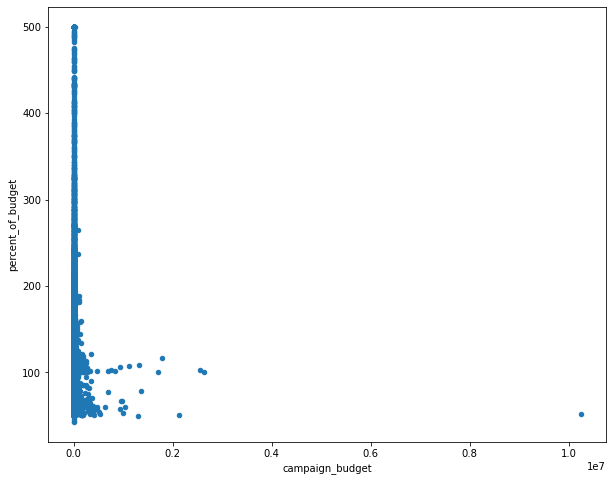

In [9]:

plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
# df['color'] = df['cluster'].map(lambda p: colors[p])
# c = df['color']


ax = df.plot(    
    kind="scatter", 
    x="campaign_budget", y="percent_of_budget",
    figsize=(10,8),   
);

centroids.plot(
    kind="scatter", 
    x="campaign_budget", y="percent_of_budget",
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

In [10]:
df.head()

,treatment,company_size,campaign_spend,campaign_budget,percent_of_budget
0,0,1,10.4477,3.9035,267.649545
1,0,2,3.7776,1.9872,190.096618
2,0,2,46.1880,55.4523,83.293209
3,0,1,6.6271,6.5136,101.742508
4,0,1,92.3405,83.1018,111.117328


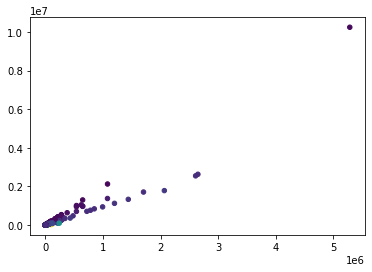

In [16]:
plt.scatter(df['campaign_spend'],df['campaign_budget'], c = df['percent_of_budget'], s=20, cmap='viridis')

In [8]:
df.head()

,treatment,company_size,campaign_spend,campaign_budget
0,0,small,10.4477,3.9035
1,0,medium,3.7776,1.9872
2,0,medium,46.1880,55.4523
3,0,small,6.6271,6.5136
4,0,small,92.3405,83.1018
